In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import sklearn.model_selection as train_test_split
import tensorflow as tf
import librosa
import pywt
import os

from sklearn.metrics import accuracy_score
from keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow import keras
from keras.models import Model

2024-03-31 07:33:26.644379: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 07:33:26.671560: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 07:33:26.671588: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 07:33:26.672556: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 07:33:26.677813: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-31 07:33:26.678400: I tensorflow/core/platform/cpu_feature_guard.cc:1

(49153,)


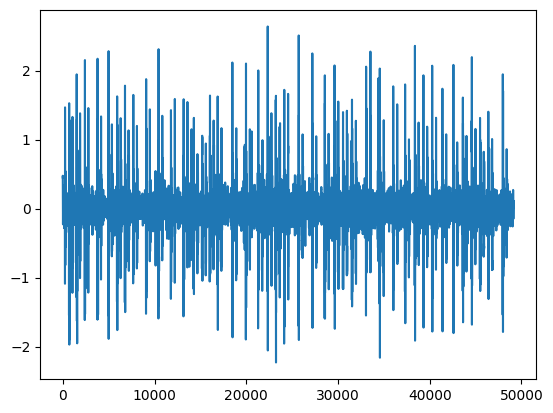

In [2]:
#Example of how to use wavelet transform on a single audio file
filename = os.getcwd() + '/data/Normal/a0007.wav'
data , sr = librosa.load(filename)


new_sample_rate = 44100
resampled_data = librosa.resample(y=data,orig_sr=sr,target_sr=new_sample_rate)

wavelet_coeffs = pywt.wavedec(resampled_data, 'haar', level=5)
print(wavelet_coeffs[0].shape)

plt.figure()
plt.plot(wavelet_coeffs[0])
plt.show()

In [3]:
root_dir = os.getcwd() + '/data'

#Get all the files in the root directory
AudioFiles = []
AudioLabels = []

for subdir, dirs, files in os.walk(root_dir,topdown=True):
    for file in files:
        if file.endswith('.wav'):
            AudioFiles.append(os.path.join(subdir, file))
            AudioLabels.append(subdir.split('/')[-1])


#split the data into training and testing
X_train , X_test, y_train, y_test = train_test_split.train_test_split(AudioFiles, AudioLabels, test_size=0.2, random_state=42)


#print the shape of X_train
print(len(X_train),len(X_test))
            

1144 286


In [4]:
#write a function to calculate the discrete wavelet transform of the audio files
def wavelet_transform(data):
    wavelet = 'haar'
    level = 5
    wavelet_coeffs = pywt.wavedec(data, wavelet, level=level)
    return wavelet_coeffs[0]

In [7]:
train_features = []
test_features = []

for file in X_train:
    data, sr = librosa.load(file)
    wavelet_coeffs = wavelet_transform(resampled_data)
    train_features.append(wavelet_coeffs)   

for file in X_test:
    data, sr = librosa.load(file)
    wavelet_coeffs = wavelet_transform(resampled_data)
    test_features.append(wavelet_coeffs)

train_features = np.array(train_features)
test_features = np.array(test_features)

print(train_features.shape)
print(test_features.shape)

(1144, 49153)
(286, 49153)


In [ ]:
def model(input_shape):
    
    return model